In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

In [2]:
data = list()
tools=["optitype","arcas","rna2hla","hlaforest","seq2hla","hlahd","phlat","hlavbseq",'hlaminer']
#datasets=["1","d2","d3","d4","d5","d6"]
for t in tools:
    total = []
    for d in range(1,7):
        gs=pd.read_csv("../datasets/"+str(d)+"_gs.csv")
        pre=pd.read_csv("../results/standard/"+str(t)+"_d"+str(d)+".csv")
        ret=compute_matches(pre,gs)
        print(t,"d"+str(d),ret)
        total.append(ret)
    data.append(total)

optitype d1 ([10, 0], [28, 0], [2892, 0])
optitype d2 ([0, 0], [0, 0], [0, 0])
optitype d3 ([6, 0], [8, 0], [280, 0])
optitype d4 ([0, 0], [0, 0], [0, 0])
optitype d5 ([0, 0], [0, 0], [8, 0])
optitype d6 ([4, 0], [0, 0], [4, 0])
arcas d1 ([35, 6], [98, 99], [2711, 1801])
arcas d2 ([0, 4], [0, 5], [0, 163])
arcas d3 ([8, 0], [59, 0], [189, 0])
arcas d4 ([0, 24], [0, 0], [0, 4])
arcas d5 ([0, 0], [0, 0], [8, 0])
arcas d6 ([3, 0], [0, 0], [5, 0])
rna2hla d1 ([34, 45], [81, 33], [2779, 898])
rna2hla d2 ([0, 14], [0, 23], [0, 127])
rna2hla d3 ([12, 0], [21, 0], [257, 0])
rna2hla d4 ([0, 20], [0, 1], [0, 5])
rna2hla d5 ([0, 0], [2, 0], [6, 0])
rna2hla d6 ([4, 0], [1, 0], [3, 0])
hlaforest d1 ([86, 36], [338, 201], [2264, 1663])
hlaforest d2 ([0, 5], [0, 26], [0, 141])
hlaforest d3 ([20, 0], [31, 0], [233, 0])
hlaforest d4 ([0, 10], [0, 4], [0, 10])
hlaforest d5 ([0, 0], [0, 0], [8, 0])
hlaforest d6 ([4, 0], [2, 0], [2, 0])
seq2hla d1 ([34, 111], [81, 186], [2779, 1649])
seq2hla d2 ([0, 52], 

In [3]:
data = np.array(data)

formatted_data = [tools,data[:,0],data[:,1],data[:,2],data[:,3],data[:,4],data[:,5]]
df = pd.DataFrame(formatted_data)

df

,0,1,2,3,4,5,6,7,8
0,optitype,arcas,rna2hla,hlaforest,seq2hla,hlahd,phlat,hlavbseq,hlaminer
1,"[[10, 0], [28, 0], [2892, 0]]","[[35, 6], [98, 99], [2711, 1801]]","[[34, 45], [81, 33], [2779, 898]]","[[86, 36], [338, 201], [2264, 1663]]","[[34, 111], [81, 186], [2779, 1649]]","[[165, 113], [83, 58], [2658, 1761]]","[[68, 161], [157, 89], [2529, 1142]]","[[278, 1867], [136, 27], [2372, 50]]","[[2207, 1185], [219, 377], [160, 0]]"
2,"[[0, 0], [0, 0], [0, 0]]","[[0, 4], [0, 5], [0, 163]]","[[0, 14], [0, 23], [0, 127]]","[[0, 5], [0, 26], [0, 141]]","[[0, 52], [0, 14], [0, 94]]","[[0, 4], [0, 5], [0, 163]]","[[0, 4], [0, 10], [0, 154]]","[[0, 73], [0, 2], [0, 75]]","[[0, 93], [0, 27], [0, 0]]"
3,"[[6, 0], [8, 0], [280, 0]]","[[8, 0], [59, 0], [189, 0]]","[[12, 0], [21, 0], [257, 0]]","[[20, 0], [31, 0], [233, 0]]","[[12, 0], [21, 0], [257, 0]]","[[19, 0], [65, 0], [176, 0]]","[[11, 0], [30, 0], [243, 0]]","[[31, 0], [23, 0], [238, 0]]","[[217, 0], [22, 0], [17, 0]]"
4,"[[0, 0], [0, 0], [0, 0]]","[[0, 24], [0, 0], [0, 4]]","[[0, 20], [0, 1], [0, 5]]","[[0, 10], [0, 4], [0, 10]]","[[0, 20], [0, 1], [0, 5]]","[[0, 16], [0, 1], [0, 11]]","[[0, 7], [0, 2], [0, 5]]","[[0, 22], [0, 0], [0, 2]]","[[0, 18], [0, 4], [0, 0]]"
5,"[[0, 0], [0, 0], [8, 0]]","[[0, 0], [0, 0], [8, 0]]","[[0, 0], [2, 0], [6, 0]]","[[0, 0], [0, 0], [8, 0]]","[[0, 0], [2, 0], [6, 0]]","[[0, 0], [0, 0], [8, 0]]","[[0, 0], [0, 0], [8, 0]]","[[0, 0], [0, 0], [8, 0]]","[[8, 0], [0, 0], [0, 0]]"
6,"[[4, 0], [0, 0], [4, 0]]","[[3, 0], [0, 0], [5, 0]]","[[4, 0], [1, 0], [3, 0]]","[[4, 0], [2, 0], [2, 0]]","[[4, 0], [1, 0], [3, 0]]","[[3, 0], [0, 0], [5, 0]]","[[4, 0], [0, 0], [4, 0]]","[[0, 0], [0, 0], [8, 0]]","[[1, 0], [2, 0], [5, 0]]"


/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_9048/4225926643.py:11: RuntimeWarning: invalid value encountered in true_divide
  fourdig = np.sum(dat[:,2],axis=1)/np.sum(np.sum(dat,axis=1),axis=1)
/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_9048/4225926643.py:12: RuntimeWarning: invalid value encountered in true_divide
  twodig = np.sum(dat[:,1],axis=1)/np.sum(np.sum(dat,axis=1),axis=1)
/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_9048/4225926643.py:11: RuntimeWarning: invalid value encountered in true_divide
  fourdig = np.sum(dat[:,2],axis=1)/np.sum(np.sum(dat,axis=1),axis=1)
/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_9048/4225926643.py:12: RuntimeWarning: invalid value encountered in true_divide
  twodig = np.sum(dat[:,1],axis=1)/np.sum(np.sum(dat,axis=1),axis=1)


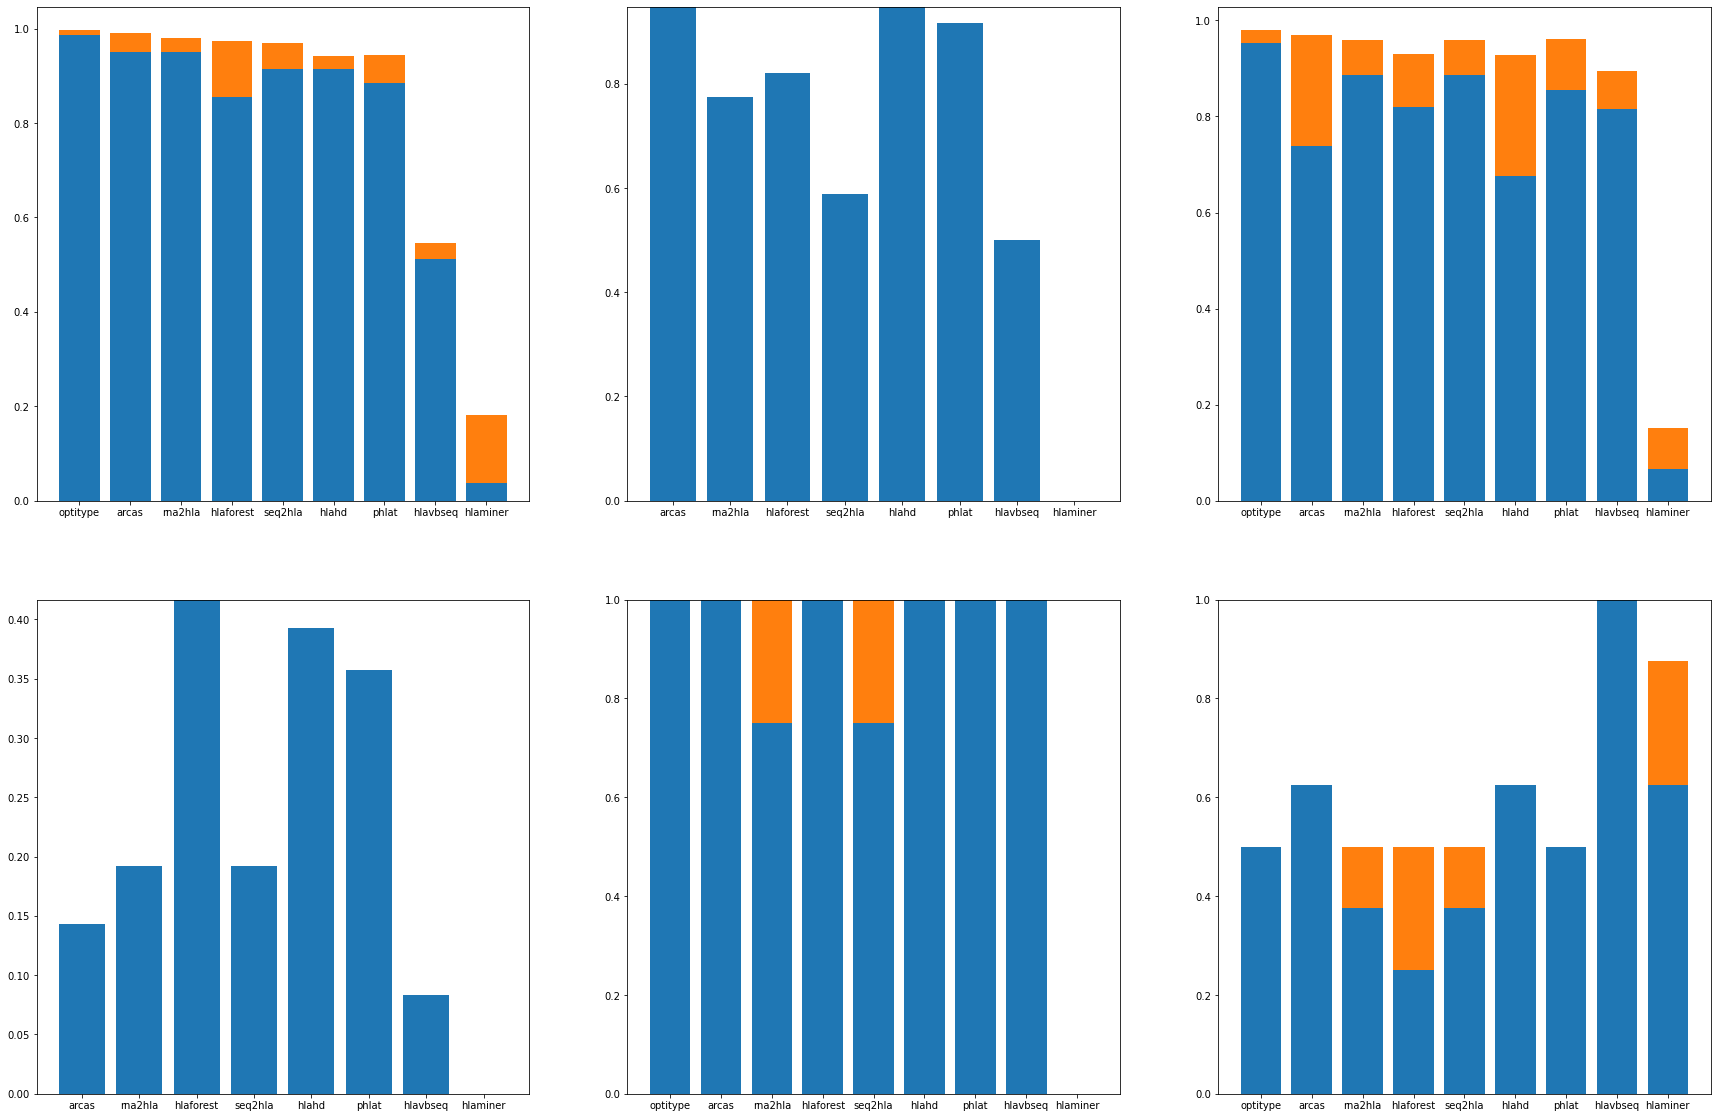

In [4]:
fig, ax = plt.subplots(2, 3,figsize=(30, 20))

idx = 1

for r in range(2):
    for c in range(3):
        dat = df.iloc[idx]
        dat =np.array([np.array(x) for x in dat])
        idx = idx+1
                
        fourdig = np.sum(dat[:,2],axis=1)/np.sum(np.sum(dat,axis=1),axis=1)
        twodig = np.sum(dat[:,1],axis=1)/np.sum(np.sum(dat,axis=1),axis=1)
        
        ax[r][c].bar(tools,fourdig)
        ax[r][c].bar(tools,twodig,bottom=fourdig)
